### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [627]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [630]:
data = pd.read_csv('data/coupons.csv')

In [632]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [635]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [637]:
# Check the count of null seen in each columns
missing_data = data.isnull().sum()
print(missing_data)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [640]:
# There are lot of missing elements for the car column, therefore check what is the percentage of NULL items
sum(data["car"].isna())/data.shape[0] * 100

99.14853358561967

In [642]:
# Check the unique elements of the car column to check the data and decide
data["car"].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

Observation: Car has 12576 number of entries as null. Further, 99.1% of the car entries are NaN. Therefore the car column can be dropped as its not having significant information that may impact the analysis.

In [644]:
# Drop the car column from the dataframe and name the new data frame as data_nocar
data_nocar=data
data_nocar.drop(columns=['car'], inplace=True)

In [646]:
# Check the new data frame and check the number of null elements
data_nocar.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [650]:
# Next check the items in the column and how many times they have visited using groupby method
occur = data_nocar.groupby(['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50']).size() 
occur


Bar    CoffeeHouse  CarryAway  RestaurantLessThan20  Restaurant20To50
1~3    1~3          1~3        1~3                   1~3                 65
                                                     less1               22
                               4~8                   1~3                 22
                                                     4~8                 22
                                                     less1               43
                                                                         ..
never  never        less1      less1                 never               88
                               never                 never               66
                    never      1~3                   never               43
                               gt8                   less1               22
                               less1                 less1               22
Length: 313, dtype: int64

In [103]:
# Remove duplicate rows
clean_data = data_nocar.drop_duplicates()

# Remove rows with any null values
clean_data = data_nocar.dropna()

# Print out the number of rows in the new DataFrame
print(f"Number of rows in clean_data: {clean_data.shape[0]}")

Number of rows in clean_data: 12079


In [652]:
# Next check each column and what the data contains to do further analysis on it.
for column in clean_data.columns:
    print(f"Value counts for {column}:")
    print(clean_data[column].value_counts())
    print("\n")
    

Value counts for destination:
destination
No Urgent Place    5970
Home               3085
Work               3024
Name: count, dtype: int64


Value counts for passanger:
passanger
Alone        6969
Friend(s)    3148
Partner      1024
Kid(s)        938
Name: count, dtype: int64


Value counts for weather:
weather
Sunny    9601
Snowy    1331
Rainy    1147
Name: count, dtype: int64


Value counts for temperature:
temperature
80    6222
55    3662
30    2195
Name: count, dtype: int64


Value counts for time:
time
6PM     3078
7AM     3024
10AM    2158
2PM     1916
10PM    1903
Name: count, dtype: int64


Value counts for coupon:
coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64


Value counts for expiration:
expiration
1d    6760
2h    5319
Name: count, dtype: int64


Value counts for gender:
gender
Female    6199
Male      5880
Name: count, dtype: int64


Va

The duplicates are dropped and its observed the total rows is now 12079 from the original value of 12864

4. What proportion of the total observations chose to accept the coupon? 



In [654]:
# Calculate the total observations who accepted the coupon
total_rows = clean_data.shape[0]
accepted_coupons = clean_data['Y'].sum()
proportion_accepted = accepted_coupons / total_rows
proportion_accepted * 100

56.93352098683666

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon by count')

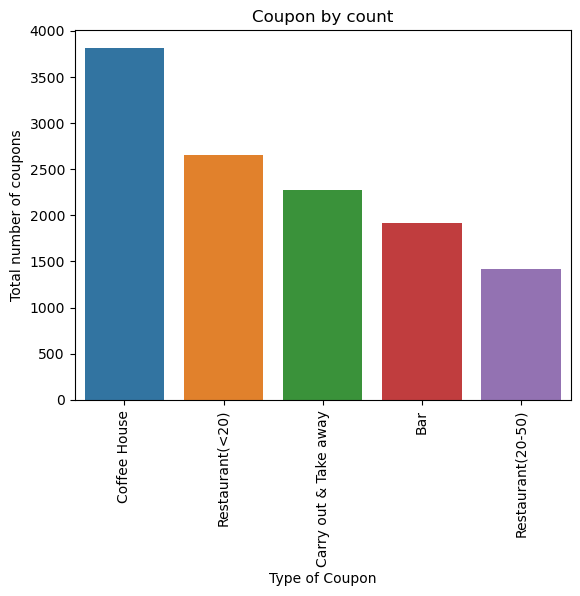

In [656]:
bar_plot_coupon = sns.barplot(x=clean_data['coupon'].value_counts().index, y =clean_data['coupon'].value_counts())
bar_plot_coupon.tick_params(axis='x', rotation=90)
bar_plot_coupon.set(xlabel='Type of Coupon', ylabel='Total number of coupons')
bar_plot_coupon.set_title('Coupon by count')

6. Use a histogram to visualize the temperature column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Histogram of the temperature values')

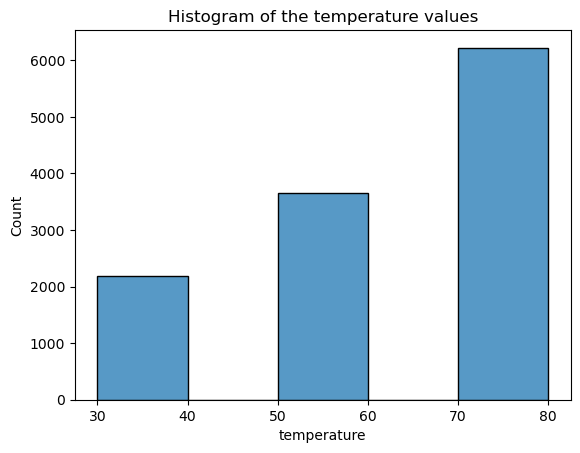

In [659]:
hist_temp_plot = sns.histplot(data = clean_data, x = 'temperature', binwidth = 10)
hist_temp_plot.set_title('Histogram of the temperature values')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [664]:
# Create a Dataframe with Bar coupon
bar_coupons_df = clean_data.query("coupon == 'Bar'")
bar_coupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [667]:
# calculate the percentage
total_rows_bar = bar_coupons_df.shape[0]
accepted_coupons_bar = bar_coupons_df['Y'].sum()
proportion_accepted_bar = accepted_coupons_bar / total_rows_bar
proportion_accepted_bar * 100

41.19184526921067

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [672]:
# Check the groups within the Bar columns and calculate the total size in each count
occur_bar = bar_coupons_df.groupby(['Bar']).size() 
occur_bar

Bar
1~3      379
4~8      147
gt8       46
less1    553
never    788
dtype: int64

In [201]:
# Check the groups within the Bar columns and calculate the total size in each count
Morethan3= ['gt8','4~8']
#create a new column
bar_coupons_df['Morethan3'] = np.where(bar_coupons_df['Bar'].isin(['gt8', '4~8']), 1, 0)
bar_coupons_df['Morethan3'].value_counts()

C:\Users\madha\AppData\Local\Temp\ipykernel_11736\753417149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['Morethan3'] = np.where(bar_coupons_df['Bar'].isin(['gt8', '4~8']), 1, 0)


Morethan3
0    1720
1     193
Name: count, dtype: int64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [674]:
# Create subsets based on the conditions
age_greater_than_25_more_visits = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['age'] > '25')]
others_greater_than_25_less_visits = bar_coupons_df[~((bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['age'] > '25'))]

age_greater_than_25_more_visits_accepted = age_greater_than_25_more_visits.query('Y == 1')
others_greater_than_25_less_visit = others_greater_than_25_less_visits.query('Y == 1')

acceptance_rate_age_greater_than_25_more_visits_accepted = age_greater_than_25_more_visits_accepted.shape[0]/age_greater_than_25_more_visits.shape[0]
acceptance_others_greater_than_25_less_visit = others_greater_than_25_less_visit.shape[0]/others_greater_than_25_less_visits.shape[0]

acceptance_rate_age_greater_than_25_more_visits_accepted * 100
#acceptance_others_greater_than_25_less_visit


68.28087167070218

In [676]:
acceptance_others_greater_than_25_less_visit * 100

33.733333333333334

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [678]:
# Create subsets based on the conditions
passenger_no_kid_occupation_not_fff = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['passanger'] != 'Kid(s)') & (bar_coupons_df['occupation'] != 'Farming Fishing & Forestry')]

passenger_no_kid_occupation_not_fff_accepted = passenger_no_kid_occupation_not_fff.query('Y == 1')

acceptanceratio_passenger_no_kid_occupation_not_fff_accepted = passenger_no_kid_occupation_not_fff_accepted.shape[0]/passenger_no_kid_occupation_not_fff.shape[0]


passenger_kid_other_occupation = bar_coupons_df[
            ~(
                (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
                (bar_coupons_df['passanger'] != 'Kid(s)') & 
                (bar_coupons_df['occupation'] != 'Farming Fishing & Forestry')
            )
]
passenger_kid_other_occupation['occupation'].unique()
passenger_kid_other_occupation_accepted = passenger_kid_other_occupation.query('Y == 1')
passenger_kid_other_occupation_accepted_ratio = passenger_kid_other_occupation_accepted.shape[0]/passenger_kid_other_occupation.shape[0]


In [680]:
passenger_kid_other_occupation_accepted_ratio * 100

29.790310918293567

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [682]:
# Check the contents of maritial status
bar_coupons_df ['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [684]:
# Check the unique values of the passanger column
bar_coupons_df ['passanger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [686]:
# Check the contents of the number of times visited for the Bar
bar_coupons_df ['Bar'].unique() 

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [688]:
# Check the contents of age and find the unique numbers
bar_coupons_df ['age'].unique() 

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*

In [690]:
# Create subsets based on the conditions
def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['21','46', '26', '31', '41', '50plus', '36'] and s['maritalStatus'] not in ['Widowed']:
        return 1
    else:
        return 0
bar_coupons_df['Bar_Freq_age_MS'] = bar_coupons_df.apply(conditions, axis=1)  
bar_coupons_df['Bar_Freq_age_MS'].value_counts()

C:\Users\madha\AppData\Local\Temp\ipykernel_11736\4164874002.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Bar_Freq_age_MS
0    1351
1     562
Name: count, dtype: int64

In [692]:
#**BCA = BAR COUPON ACCEPTED
BCA_notwidowed = bar_coupons_df.query("Bar_Freq_age_MS==1")['Y'].value_counts()[1]
BCA_notwidowed
Total_BCA_notwidowed =  bar_coupons_df.query("Bar_Freq_age_MS==1")['Y'].count()
Total_BCA_notwidowed 
Ratio_BCA_notwidowed = BCA_notwidowed / Total_BCA_notwidowed 
Ratio_BCA_notwidowed * 100

69.03914590747331

- go to bars more than once a month and are under the age of 30 *OR*

In [694]:
# Create subsets based on the conditions
def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['below21', '21', '26']:
        return 1
    else:
        return 0
bar_coupons_df['Bar_Freq_age_below30'] = bar_coupons_df.apply(conditions, axis=1)  
bar_coupons_df['Bar_Freq_age_below30'].value_counts()

C:\Users\madha\AppData\Local\Temp\ipykernel_11736\2852626120.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Bar_Freq_age_below30
0    1585
1     328
Name: count, dtype: int64

In [696]:
#**BCA = BAR COUPON ACCEPTED
BCA_below30 = bar_coupons_df.query ("Bar_Freq_age_below30==1")['Y'].value_counts()[1]
BCA_below30
Total_BCA_below30 = bar_coupons_df.query("Bar_Freq_age_below30==1")['Y'].count()
Total_BCA_below30
Ratio_BCA_below30 = BCA_below30 / Total_BCA_below30
Ratio_BCA_below30 * 100 

71.95121951219512

- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [698]:
# Create subsets based on the conditions by checking the contents of Restaurant < 20
bar_coupons_df ['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [700]:
# Create subsets based on the conditions for the income group
bar_coupons_df ['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [702]:
# Create subsets based on the conditions
def conditions(s):
    if s['RestaurantLessThan20'] in ['gt8', '4~8'] and s['income'] in ['$12500 - $24999', '$37500 - $49999', '$25000 - $37499', 'Less than $12500']:
        return 1
    else:
        return 0
bar_coupons_df['Bar_cheap_Restaurant_lowincome'] = bar_coupons_df.apply(conditions, axis=1)  
bar_coupons_df['Bar_cheap_Restaurant_lowincome'].value_counts()

C:\Users\madha\AppData\Local\Temp\ipykernel_11736\2407514892.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Bar_cheap_Restaurant_lowincome
0    1580
1     333
Name: count, dtype: int64

In [708]:
#**BCA = BAR COUPON ACCEPTED
BCA_Bar_cheap_Restaurant_lowincome = bar_coupons_df.query ("Bar_cheap_Restaurant_lowincome==1")['Y'].value_counts()[1]
Total_BCA_Bar_cheap_Restaurant_lowincome = bar_coupons_df.query("Bar_cheap_Restaurant_lowincome==1")['Y'].count()
Ratio_BCA_Bar_cheap_Restaurant_lowincome = BCA_Bar_cheap_Restaurant_lowincome / Total_BCA_Bar_cheap_Restaurant_lowincome
Ratio_BCA_Bar_cheap_Restaurant_lowincome * 100

45.645645645645644

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [715]:
print("The value of acceptance_rate_age_greater_than_25_more_visits_accepted  {}".format(acceptance_rate_age_greater_than_25_more_visits_accepted))
print("The value of acceptance_others_greater_than_25_less_visit  {}".format(acceptance_others_greater_than_25_less_visit))
print("The value of acceptanceratio_passenger_no_kid_occupation_not_fff_accepted  {}".format(acceptanceratio_passenger_no_kid_occupation_not_fff_accepted))
print("The value of passenger_kid_other_occupation_accepted_ratio  {}".format(passenger_kid_other_occupation_accepted_ratio))
print("The value of Ratio_BCA_notwidowed  {}".format(Ratio_BCA_notwidowed))
print("The value of Ratio_BCA_below30  {}  ".format(Ratio_BCA_below30))
print("The value of Ratio_BCA_Bar_cheap_Restaurant_lowincome  {}".format(Ratio_BCA_Bar_cheap_Restaurant_lowincome))

The value of acceptance_rate_age_greater_than_25_more_visits_accepted  0.6828087167070218
The value of acceptance_others_greater_than_25_less_visit  0.3373333333333333
The value of acceptanceratio_passenger_no_kid_occupation_not_fff_accepted  0.7094339622641509
The value of passenger_kid_other_occupation_accepted_ratio  0.29790310918293567
The value of Ratio_BCA_notwidowed  0.6903914590747331
The value of Ratio_BCA_below30  0.7195121951219512  
The value of Ratio_BCA_Bar_cheap_Restaurant_lowincome  0.45645645645645644


Drivers who are more frequently visiting the bar are accepting the coupons. 
Older drivers who visit the bar frequently have accepted the coupon than younger drivers. 
Older drivers whose occupation is not farming/fishing/forestry have accepted the coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

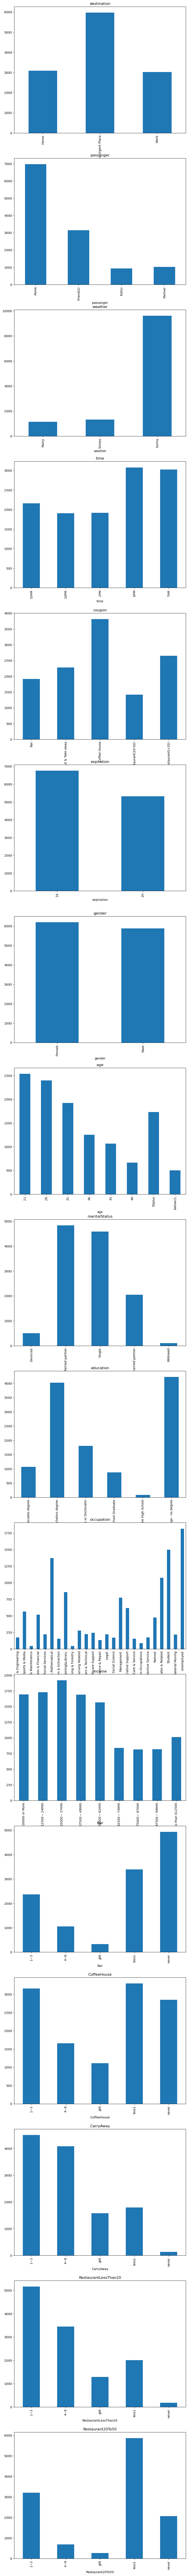

In [719]:
# Plot all the data to understand the columns in more detail
categoricals = clean_data.select_dtypes(include=['object'])
fig, axes = plt.subplots(categoricals.shape[-1], 1, figsize=[10, 150])

for i in range(categoricals.shape[-1]):
    categoricals.iloc[:, i].value_counts().sort_index().plot(kind='bar', ax=axes[i], title=categoricals.columns[i])
    

Coupon Type: Coffee Shop 

In [721]:
# **CS ==  Coffee Shop
CS_coupons_df = data.query ("coupon == 'Coffee House'")
CS_coupons_df.count()
CS_coupons_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  Bar                   3959 non-null   object
 15  CoffeeHouse           3924 non-null   obje

In [723]:
CS_coupons_df .head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [725]:
#Coupon Type: Restaurant(<20)
R_lessthan20_coupons_df = data.query ("coupon == 'Restaurant(<20)'")
R_lessthan20_coupons_df.head()
R_lessthan20_coupons_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2786 entries, 0 to 12678
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2786 non-null   object
 1   passanger             2786 non-null   object
 2   weather               2786 non-null   object
 3   temperature           2786 non-null   int64 
 4   time                  2786 non-null   object
 5   coupon                2786 non-null   object
 6   expiration            2786 non-null   object
 7   gender                2786 non-null   object
 8   age                   2786 non-null   object
 9   maritalStatus         2786 non-null   object
 10  has_children          2786 non-null   int64 
 11  education             2786 non-null   object
 12  occupation            2786 non-null   object
 13  income                2786 non-null   object
 14  Bar                   2763 non-null   object
 15  CoffeeHouse           2739 non-null   obje

In [727]:
#Coupon Type: Carry out & Take away
R_CO_TA_df= data.query ("coupon == 'Carry out & Take away'")
R_CO_TA_df.head()
R_CO_TA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2393 entries, 2 to 12680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2393 non-null   object
 1   passanger             2393 non-null   object
 2   weather               2393 non-null   object
 3   temperature           2393 non-null   int64 
 4   time                  2393 non-null   object
 5   coupon                2393 non-null   object
 6   expiration            2393 non-null   object
 7   gender                2393 non-null   object
 8   age                   2393 non-null   object
 9   maritalStatus         2393 non-null   object
 10  has_children          2393 non-null   int64 
 11  education             2393 non-null   object
 12  occupation            2393 non-null   object
 13  income                2393 non-null   object
 14  Bar                   2377 non-null   object
 15  CoffeeHouse           2361 non-null   obje

In [729]:
#Coupon Type: Restaurant(20-50) 
R_20_50_coupons_df = data.query ("coupon == 'Restaurant(20-50)'")
R_20_50_coupons_df.head()
R_20_50_coupons_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1492 entries, 14 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1492 non-null   object
 1   passanger             1492 non-null   object
 2   weather               1492 non-null   object
 3   temperature           1492 non-null   int64 
 4   time                  1492 non-null   object
 5   coupon                1492 non-null   object
 6   expiration            1492 non-null   object
 7   gender                1492 non-null   object
 8   age                   1492 non-null   object
 9   maritalStatus         1492 non-null   object
 10  has_children          1492 non-null   int64 
 11  education             1492 non-null   object
 12  occupation            1492 non-null   object
 13  income                1492 non-null   object
 14  Bar                   1482 non-null   object
 15  CoffeeHouse           1465 non-null   obj

In [731]:
#Coupon Type: Bar 
Bar_coupons_df = data.query ("coupon == 'Bar'")
Bar_coupons_df.head()
Bar_coupons_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   1996 non-null   object
 15  CoffeeHouse           1978 non-null   obje

In [733]:
coupons_aggregates = data.groupby("coupon").agg({"coupon": 'size', 'Y':'sum'})
coupons_aggregates.rename(columns={"coupon":"total_count","Y":"acceptance_count"},inplace=True)
coupons_aggregates = coupons_aggregates.reset_index()
coupons_aggregates["acceptance_percentage"] = coupons_aggregates["acceptance_count"]/coupons_aggregates["total_count"]*100
coupons_aggregates

,coupon,total_count,acceptance_count,acceptance_percentage
0,Bar,2017,827,41.001487
1,Carry out & Take away,2393,1760,73.547848
2,Coffee House,3996,1995,49.924925
3,Restaurant(20-50),1492,658,44.101877
4,Restaurant(<20),2786,1970,70.710696


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

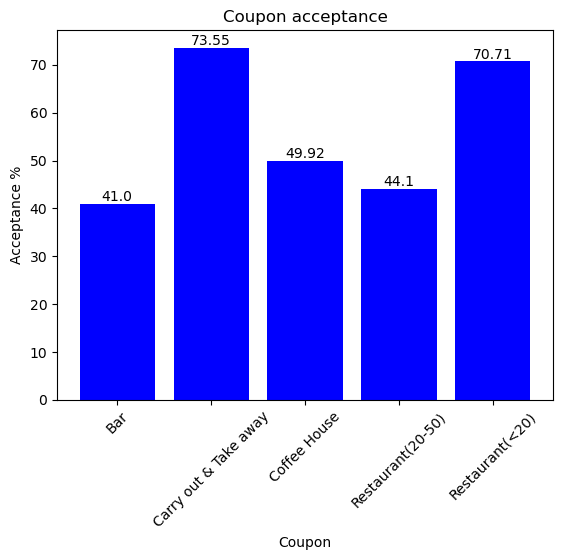

In [735]:
# Plot a bar plot for the accepted percentages for different coupons to understand the distribution observed
bars = plt.bar(coupons_aggregates["coupon"],coupons_aggregates["acceptance_percentage"], color = 'blue')
plt.bar_label(bars,np.round(coupons_aggregates["acceptance_percentage"],decimals=2))
plt.xlabel("Coupon")
plt.ylabel("Acceptance %")
plt.title("Coupon acceptance")
plt.xticks(rotation=45)

In [737]:
# Check the percentage of coupons accepted for coffee coupon
coffee_coupon_accepted = CS_coupons_df['Y'].value_counts()[1]
coffee_coupon_accepted

1995

In [739]:
# Check the percentage of coupons not accepted for coffee coupon
coffee_coupon_not_accepted = CS_coupons_df['Y'].value_counts()[0]
coffee_coupon_not_accepted

2001

In [741]:
# Total coupon count of coffee for calculating the ratio
Total_coffee_coupon_offered = CS_coupons_df['Y'].count()

In [743]:
# Calculate the ratio of coupon that was accepted
Ratio_coffee_coupon_accepted = coffee_coupon_accepted / Total_coffee_coupon_offered 
Percentage_coffee_coupon_accepted = Ratio_coffee_coupon_accepted *100
Percentage_coffee_coupon_accepted 

49.92492492492492

In [745]:
# Calculate the ratio of coupon that was not accepted
Percentage_coffee_coupon_not_accepted = (coffee_coupon_not_accepted / Total_coffee_coupon_offered)*100
Percentage_coffee_coupon_not_accepted

50.07507507507507

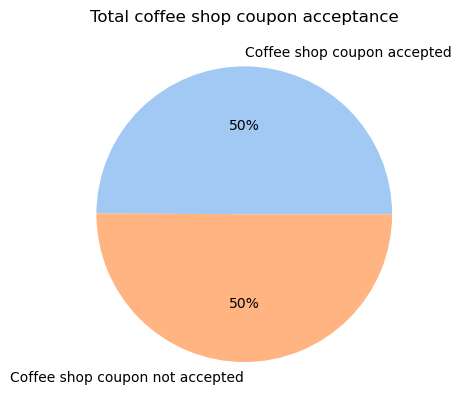

In [747]:
# plot a pie chart of accepted vs not accepted for the coffee coupon
data = [Percentage_coffee_coupon_accepted, Percentage_coffee_coupon_not_accepted]
labels = ['Coffee shop coupon accepted', 'Coffee shop coupon not accepted']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Total coffee shop coupon acceptance')
plt.show()

More Carry out & Take away drivers accepted coupons. However, more data is available for the "Coffee Shop" coupon type. Since the probability of accepting a coffee shop coupon is 50 / 50, I am focusing on the coffee shop coupon type for further investigation.

In [750]:
CS_coupons_df['coupon_accepted'] = CS_coupons_df['Y']
CS_coupons_df['coupon_accepted'] = CS_coupons_df['coupon_accepted'].astype ("string")
CS_coupons_df['coupon_accepted'] = CS_coupons_df['coupon_accepted'].str.replace('1', 'Accepted')
CS_coupons_df['coupon_accepted'] = CS_coupons_df['coupon_accepted'].str.replace('0', 'Not Accepted')

C:\Users\madha\AppData\Local\Temp\ipykernel_11736\1995847587.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\madha\AppData\Local\Temp\ipykernel_11736\1995847587.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\madha\AppData\Local\Temp\ipykernel_11736\1995847587.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [752]:
CS_coupons_df['coupon_accepted'].unique()

<StringArray>
['Not Accepted', 'Accepted']
Length: 2, dtype: string

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='coupon_accepted', ylabel='Count'>

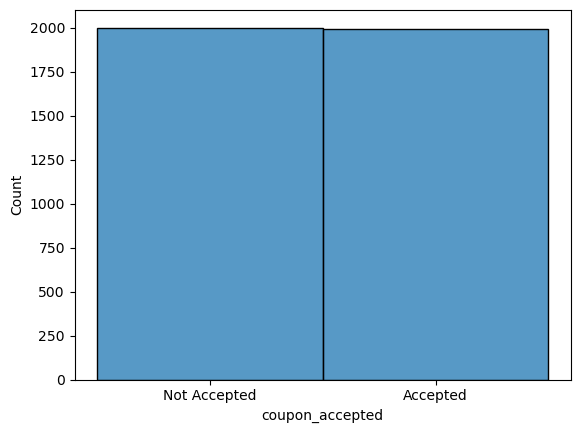

In [756]:
# Plot using histplot of the accepted vs not accepted
sns.histplot(data = CS_coupons_df, x ='coupon_accepted', bins = 20)

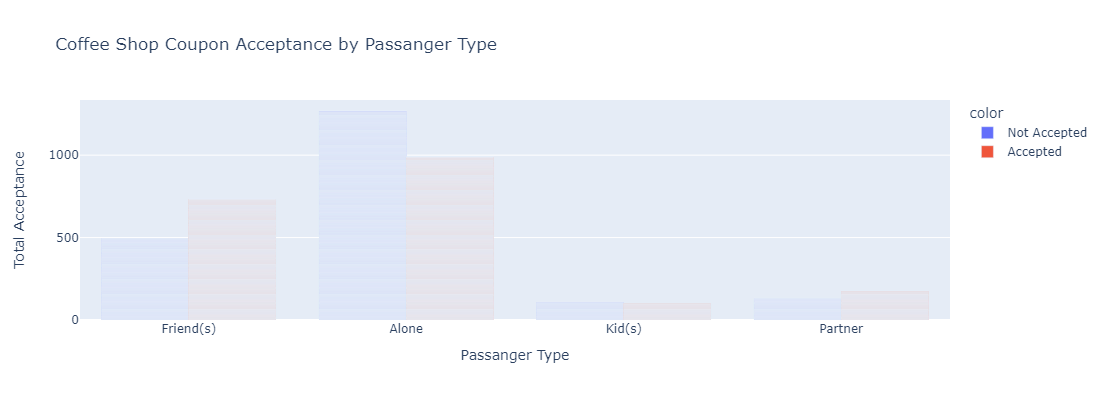

In [758]:
# Use bar plot to show accepted vs not accepted coupons for the passenger type
fig1 = px.bar(CS_coupons_df['passanger'], color=CS_coupons_df['coupon_accepted'], 
             title = 'Coffee Shop Coupon Acceptance by Passanger Type',
            labels={'value':'Passanger Type',
                   'count':'Total Acceptance'},
             barmode='group',
             height=400)
fig1.show()

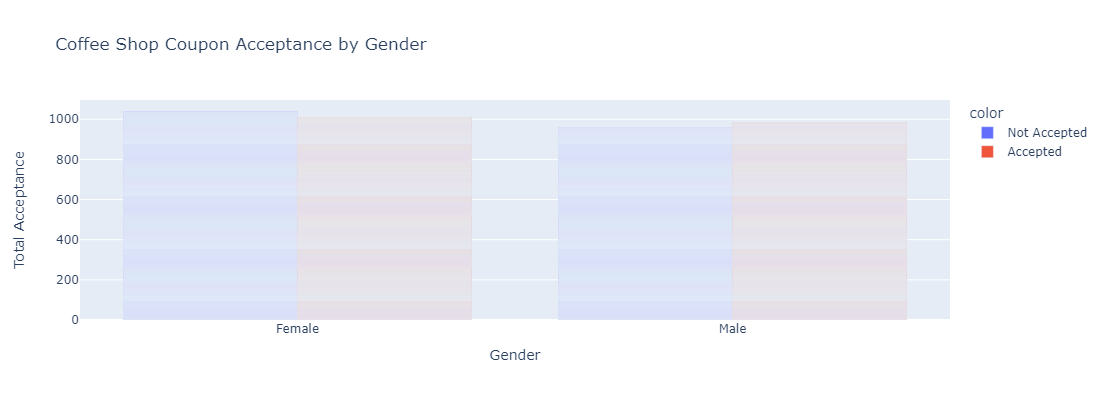

In [760]:
#Gender
fig2 = px.bar(CS_coupons_df['gender'], color=CS_coupons_df['coupon_accepted'], 
             title = 'Coffee Shop Coupon Acceptance by Gender',
            labels={'value':'Gender',
                   'count':'Total Acceptance'},
             barmode='group',
             height=400)
fig2.show()

Female drivers relatively accepted more coffee shop coupons 

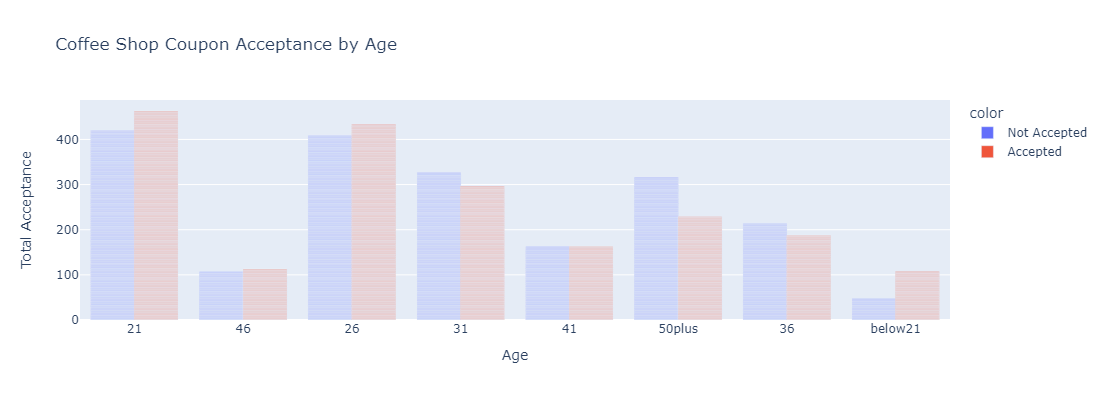

In [762]:
#Age
fig3 = px.bar(CS_coupons_df['age'], color=CS_coupons_df['coupon_accepted'], 
             title = 'Coffee Shop Coupon Acceptance by Age',
            labels={'value':'Age',
                   'count':'Total Acceptance'},
             barmode='group',
             height=400)
fig3.show()

Drivers aged between 21 and 30 accepted more coffee shop coupons than the older drivers. Kids accepted very less coupons.

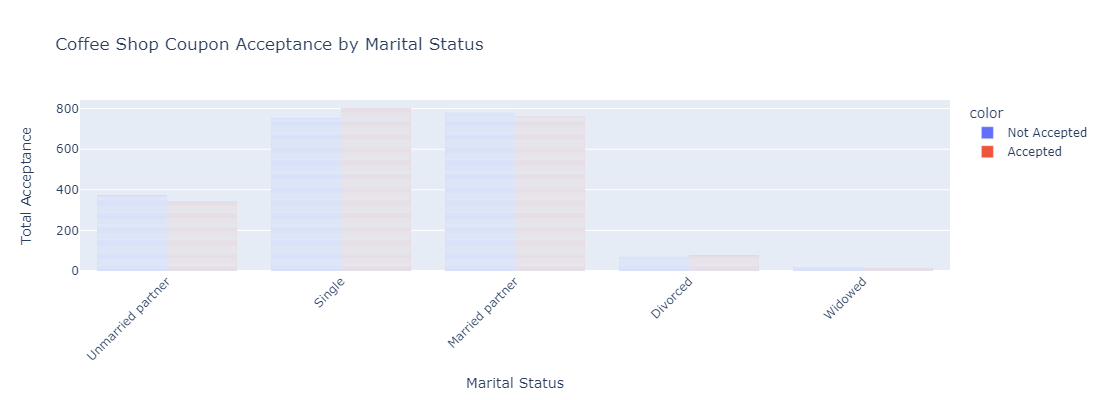

In [565]:
#maritalStatus
fig4 = px.bar(CS_coupons_df['maritalStatus'], color=CS_coupons_df['coupon_accepted'], 
             title = 'Coffee Shop Coupon Acceptance by Marital Status',
            labels={'value':'Marital Status',
                   'count':'Total Acceptance'},
             barmode='group',
             height=400)
fig4.update_layout(xaxis_tickangle=-45)
fig4.show()

Single Drivers and Married Drivers accepted more coffee shop coupons than other drivers.

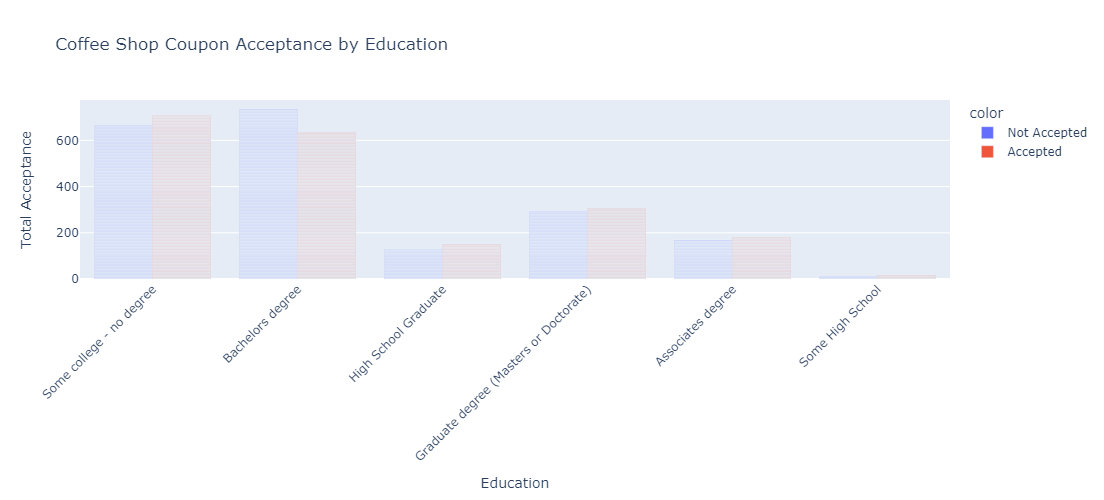

In [765]:
#education 
fig5 = px.bar(CS_coupons_df['education'], color=CS_coupons_df['coupon_accepted'], 
             title = 'Coffee Shop Coupon Acceptance by Education',
            labels={'value':'Education',
                   'count':'Total Acceptance'},
             barmode='group',
             height=500)
fig5.update_layout(xaxis_tickangle=-45)
fig5.show()

Drivers with bachelor's degrees accepted more coffee shop coupons than other drivers.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



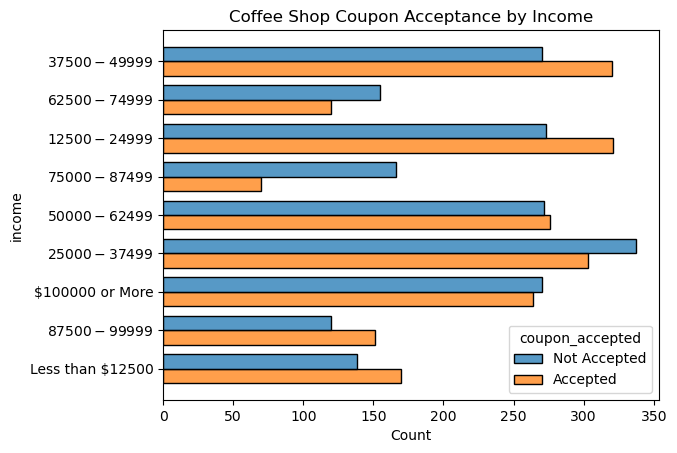

In [768]:
fig6 = sns.histplot(data=CS_coupons_df, y="income", binwidth=3, hue="coupon_accepted", multiple="dodge", shrink=.75). set(title='Coffee Shop Coupon Acceptance by Income')

The acceptance of coffee shop coupons is not affected by driver's income.

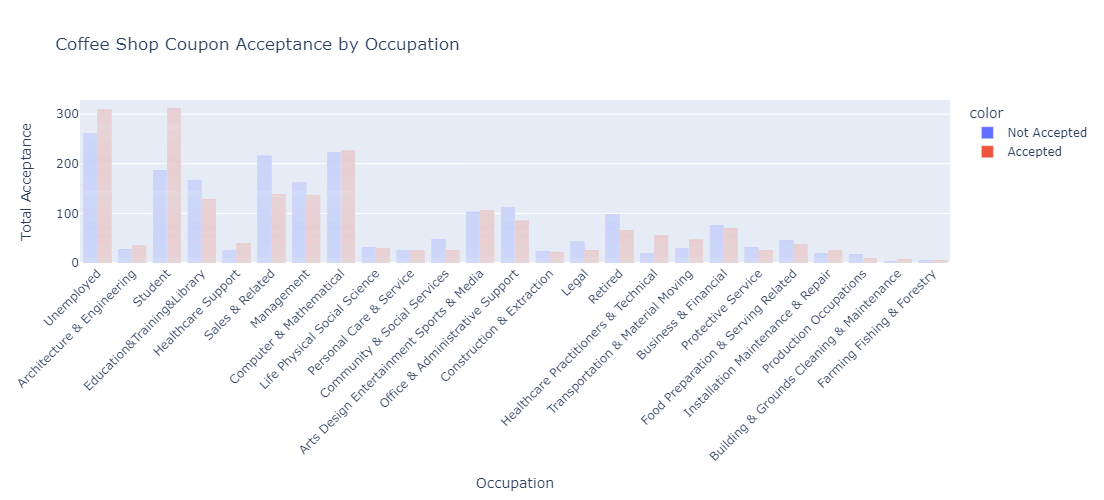

In [771]:
#occupation
fig7 = px.bar(CS_coupons_df['occupation'], color=CS_coupons_df['coupon_accepted'], 
             title = 'Coffee Shop Coupon Acceptance by Occupation',
            labels={'value':'Occupation',
                   'count':'Total Acceptance'},
             barmode='group',
             height=500)
fig7.update_layout(xaxis_tickangle=-45)
fig7.show()

Unemployed and Student Drivers accepted more coffee shop coupons than other drivers.

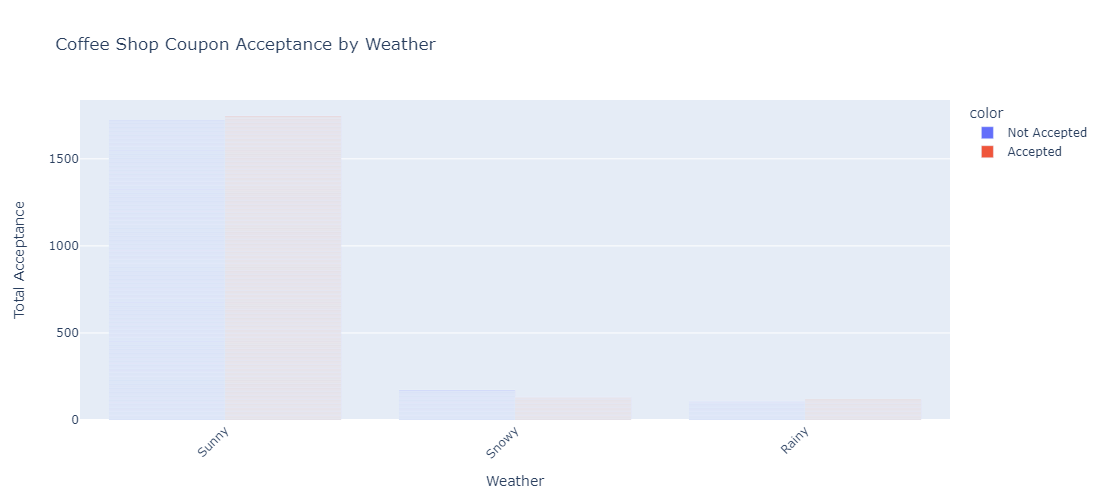

In [603]:
#weather
fig8 = px.bar(CS_coupons_df['weather'], color=CS_coupons_df['coupon_accepted'], 
             title = 'Coffee Shop Coupon Acceptance by Weather',
            labels={'value':'Weather',
                   'count':'Total Acceptance'},
             barmode='group',
             height=500)
fig8.update_layout(xaxis_tickangle=-45)
fig8.show()

Drivers tend to accept more coffee shop coupons during sunny weather.


Final Summary
- There are a lot of missing elements for the car column. The car had 12576 entries as null. Further, 99.1% of the car entries are NaN. Therefore dropped the car column as it did not have significant information that may impact the analysis.

- The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to all others is 68.2% vs 33.7%
- The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 70.9% vs 29.79%
- The acceptance rates between drivers who 
go to bars more than once a month, had passengers that were not a kid, and were not widowedwas 69.03%
- The acceptance rates between drivers who 
go to bars more than once a month and are under the age of 3was 71.9%
- The acceptance rates between drivers who R
go to cheap restaurants more than 4 times a month and income is less than  was 45.64%

- More Carry out & Take away drivers accepted coupons. However, more data is available for the "Coffee Shop" coupon type. Since the probability of accepting a coffee shop coupon is 50 / 50, I am focusing on the coffee shop coupon type for further investigation.
- Drivers driving alone tend to accept more coupons than those who have passengers
- Female drivers by a small margin accepted more coupons.
- Drivers aged between 21 and 30 accepted more coffee shop coupons than the older drivers. Kids accepted very less coupons.
- Single drivers and Married Drivers accepted more coffee shop coupons than other drivers.
- Drivers with bachelor's degrees accepted more coffee shop coupons than other drivers.
- The driver's income did not impact the acceptance of the coffee shop coupons.
- Unemployed and Student Drivers accepted more coffee shop coupons than other drivers.
- Drivers tend to accept more coffee shop coupons during sunny weather.645645644